# Exercice 1

Pour $n \in \mathbb{N}^*$, on s'intéresse au calcul du polynôme (algébrique)
de degré inférieur ou égal à $n$ qui interpole la fonction $f$ en $n+1$
points équidistants $(x_k)_{k=0}^n$ de l'intervalle $I = [0,1]$.

On cherche ce polynôme sous la forme
\[
I_n f(x) = \sum_{k=0}^{n} a_k x^k.
\]

On définit les vecteurs
\[
a = (a_0, \dots, a_n)^T
\quad \text{et} \quad
y = (f(x_0), \dots, f(x_n))^T.
\]


## 1. Question

Écrire une fonction calculant la matrice \( M \) telle que
\[
M a = y.
\]


---

## 2.  
Pour résoudre ce système linéaire, utiliser la fonction `inv` de la bibliothèque `linalg` de `numpy` qui calcule l’inverse d’une matrice.

**Application** : $f(x) = e^{3x} \sin(6x)$ et $n = 10, 15, 20, 25, \dots$

Représenter sur un même graphique la fonction $f$ et le polynôme $I_n f$.  
*Utiliser un grand nombre de points pour représenter assez finement les fonctions (car si on ne les représente qu’aux points d’interpolation, elles coïncident, bien sûr !).*


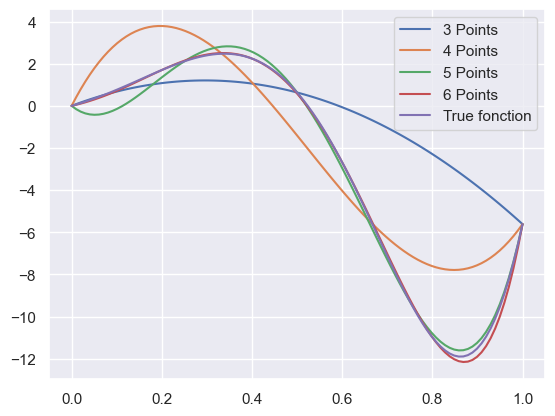

In [32]:
import numpy as np

#on doit resoudre un système linéaire étant donnée X = [x_0,,....,x_n] et Y=[f(x_0),.....,f(x_n)]
#M en effet est la matrice de vandermonde où chaque colomne 'i' est [x_0**i,.....,x_n**i]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")


def vandermonde_matrix(X):
    return np.vander(X, increasing=True)

def inverseM_solve(M, Y):
    invM = np.linalg.inv(M)
    return invM@Y

def f(x):
    return np.exp(3*x)*np.sin(6*x)

def poly(A, x):
    r = 0
    for i in range(len(A)):
        r += A[i]*x**i
    return r

fig, ax = plt.subplots()

for i in range(3,7):
    X = np.linspace(0,1,i)
    Y = f(X)
    M = vandermonde_matrix(X)
    A = inverseM_solve(M,Y)

    ax.plot(np.linspace(0,1,100), poly(A, np.linspace(0,1,100)), label=f"{i} Points")
ax.plot(np.linspace(0,1,100), f(np.linspace(0,1,100)), label="True fonction")
plt.legend()
plt.show()










---

## 3.  
Mêmes questions en utilisant la fonction `solve` de la même bibliothèque qui résout les systèmes linéaires.

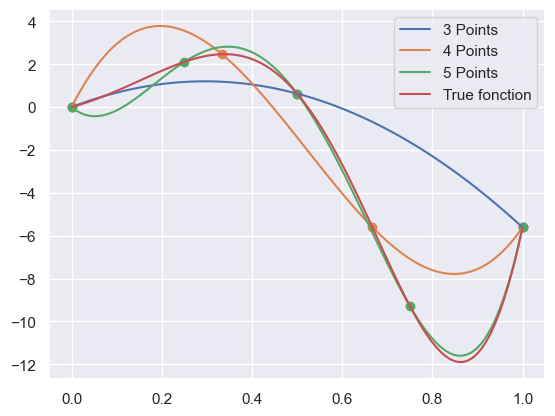

In [ ]:
import numpy as np

#on doit resoudre un système linéaire étant donnée X = [x_0,,....,x_n] et Y=[f(x_0),.....,f(x_n)]
#M en effet est la matrice de vandermonde où chaque colomne 'i' est [x_0**i,.....,x_n**i]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")


def vandermonde_matrix(X):
    return np.vander(X, increasing=True)

def solve(M, Y):
    return np.linalg.solve(M,Y)

def f(x):
    return np.exp(3*x)*np.sin(6*x)

def poly(A, x):
    r = 0
    for i in range(len(A)):
        r += A[i]*x**i
    return r

fig, ax = plt.subplots()

for i in range(3,7):
    X = np.linspace(0,1,i)
    Y = f(X)
    M = vandermonde_matrix(X)
    A = inverseM_solve(M,Y)

    ax.scatter(X, poly(A,X))
    ax.plot(np.linspace(0,1,100), poly(A, np.linspace(0,1,100)), label=f"{i} Points")
ax.plot(np.linspace(0,1,100), f(np.linspace(0,1,100)), label="True fonction")
plt.legend()
plt.show()










# **Exercice 2 : Interpolation trigonométrique (via la résolution d'un système linéaire)**

## **Énoncé**

Soit la fonction $2\pi$-périodique définie sur $[0, 2\pi]$ par :

$$
f(x) = e^{x} \sin(2x)
$$

Pour $N \in \mathbb{N}^*$ et $k = 0, \dots, N-1$, on définit :
$$
x_k = kh \quad \text{avec} \quad h = \frac{2\pi}{N}
$$
et
$$
z_k = e^{i x_k}
$$

On cherche le polynôme trigonométrique interpolant $f$ aux points $x_k$ sous la forme :
$$
I_N f(x) = \sum_{k=-N+1}^{N} a_k e^{ikx}
$$

---

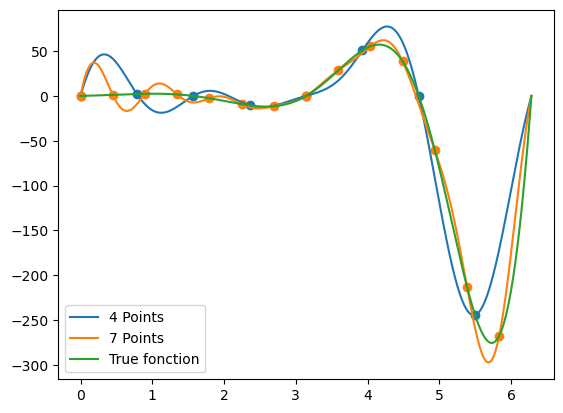

In [27]:
#on va essayer d'utiliser un méthode similaire a l'anterieur
import numpy as np
import matplotlib.pyplot as plt


def matrix(Z):
    M = []
    for i in range(-N+1, N+1):
        M.append(Z**i)
    return np.array(M).T


def solve(M, Y):
    return np.linalg.solve(M,Y)

def f(x):
    return np.exp(x)*np.sin(2*x)

def poly(A, x):
    r = 0
    for i in range(0, 2*N):
        r += A[i]*np.exp((i-N+1)*1j*x)
    return r

n = [4,7]
fig, ax = plt.subplots()

for N in n:
    h =2*np.pi/(2*N)

    X = h*np.arange(2*N)
    Z = np.exp(1j*X)


    Y = f(X)
    M = matrix(Z)
    A = solve(M,Y)

    ax.scatter(X, poly(A,X))
    ax.plot(np.linspace(0,2*np.pi,1000), poly(A, np.linspace(0,2*np.pi,1000)), label=f"{N} Points")
ax.plot(np.linspace(0,2*np.pi,1000), f(np.linspace(0,2*np.pi,1000)), label="True fonction")
plt.legend()
plt.show()



# Exercice 3 : Interpolation trigonométrique (via la série de Fourier discrète)

## 1. Fonction `Points(N)`
Écrire une fonction `Points(N)` qui renvoie un tableau contenant les points d'interpolation :
\[
x_k = \frac{k\pi}{N} \quad \text{pour} \quad k = 0, \dots, 2N-1.
\]

---

In [77]:
def point(N):
    return np.arange(2*N)*np.pi/N

## 2. Fonction `CoeffFD(x, y)`
Écrire une fonction `CoeffFD(x, y)` qui, à partir de :
- Un tableau `x` contenant les points d'interpolation,
- Un tableau `y` contenant les valeurs \( y_k \),

calcule les coefficients de Fourier discrets \( (\hat{f}_j)_{j=-N+1}^{N} \) :
\[
\hat{f}_j = \frac{1}{2N} \sum_{k=0}^{2N-1} y_k \, e^{-ijx_k}.
\]

**Note** : Chaque \( y_k \) est censé être la valeur au point \( x_k \) d'une fonction \( 2\pi \)-périodique \( f \) :  
\[
y_k = f(x_k).
\]

---

In [81]:
def exponential_sum(i,P,Y):
    r = 0
    for k in range(len(P)):
        r+=Y[k]*np.exp(-1j*(i-len(P)/2+1)*P[k])
    return 1/(len(P))*r


def CoeffFD(P,Y):
    F = np.zeros(len(P), dtype=complex)
    for j in range(len(P)):
        F[j] = exponential_sum(j,P,Y)
    return F

## 3. Fonction `Interpol`
Écrire une fonction `Interpol` calculant les valeurs du polynôme d'interpolation trigonométrique sur une grille de points `X`.

**Paramètres d'entrée** :
- Les coefficients discrets calculés par `CoeffFD`,
- Le tableau `X`.


## Application
Pour la fonction :
\[
f(x) = e^{x/2} \sin(2x),
\]
représenter sur une même figure :

1. La fonction \( f \) et son interpolée sur \([0, 2\pi]\).
2. La fonction \( f \) et son interpolée sur \([0, 7]\).

**Commenter les résultats**.

In [82]:
def Interpol(X, F):
    Y = np.zeros(len(X), dtype=complex)
    for i in range(0, len(F)):
        Y += F[i]*np.exp(1j*(i-len(F)/2+1)*X)
    return Y

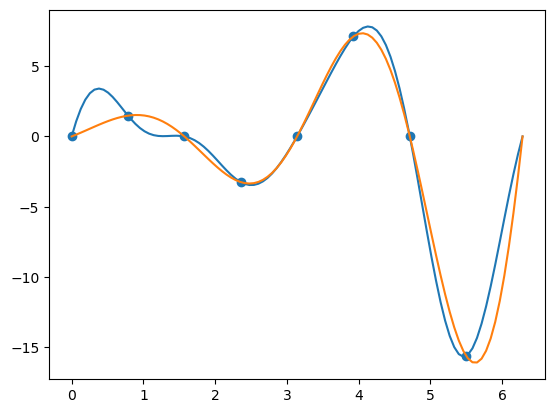

In [86]:
import matplotlib.pyplot as plt

def f(x):
    return np.exp(x/2)*np.sin(2*x)

#on represente la fonction et son interpolée sur [0, 2pi]
n = 4
P = point(n)
Y = f(P)
F = CoeffFD(P, Y)
S = np.linspace(0, np.pi*2, 100)

fig, ax = plt.subplots()
ax.scatter(P, Interpol(P,F))
ax.plot(S, Interpol(S, F), label=f"Interpolation of {n} points")
ax.plot(S, f(S), label="True function")

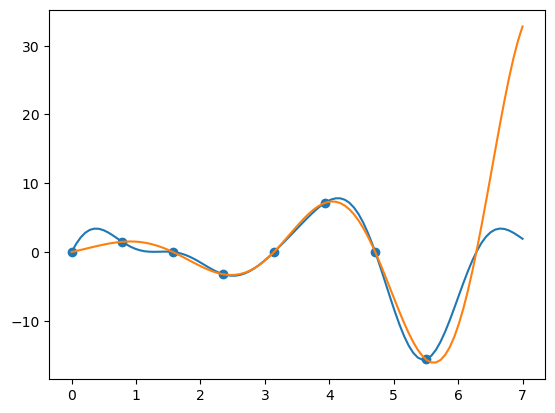

In [ ]:
import matplotlib.pyplot as plt

def f(x):
    return np.exp(x/2)*np.sin(2*x)

#on represente la fonction et son interpolée sur [0, 7]
n = 4
P = point(n)
Y = f(P)
F = CoeffFD(P, Y)
S = np.linspace(0,7, 100)

fig, ax = plt.subplots()
ax.scatter(P, Interpol(P,F))
ax.plot(S, Interpol(S, F), label=f"Interpolation of {n} points")
ax.plot(S, f(S), label="True function")

# Exercice 4 : Noyaux de Dirichlet et de Fejér

Le noyau de Dirichlet est le polynôme trigonométrique $D_n$ défini pour tout entier non nul $n$ par

\[
D_n(x) = \sum_{k=-n}^{n} e^{ikx} = 1 + 2\sum_{k=1}^{n} \cos(kx) = 
\begin{cases}
2n + 1 & \text{si } n \text{ est un multiple de } 2\pi, \\
\dfrac{\sin\big((n+1/2)x\big)}{\sin(x/2)} & \text{sinon}.
\end{cases}
\]

---

## **Question 1**

Pour diverses valeurs de $n$, tracer $D_n$ sur l'intervalle $[-\pi, \pi]$.

<function matplotlib.pyplot.show(close=None, block=None)>

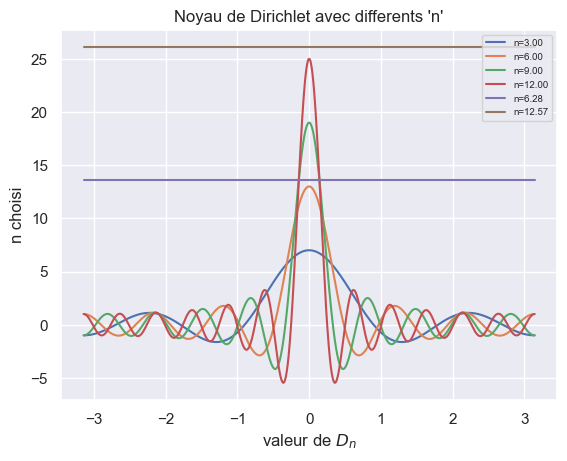

In [117]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

def dirichlet(i,x):
    if((i%(2*np.pi)) <= 1e-7):
        return np.full_like(x, 2*i+1)
    return np.sin((i+1/2)*x)/np.sin(x/2)



N = np.arange(3,15,3)
N = np.append(N,[2*np.pi, 4*np.pi])
X = np.linspace(-np.pi, np.pi, 1000)

fig, ax = plt.subplots()
plt.title("Noyau de Dirichlet avec differents 'n'")
for i in N:
    ax.plot(X, dirichlet(i,X), label=f"n={i:.2f}")
    ax.set_xlabel('valeur de $D_n$')
    ax.set_ylabel('n choisi')
plt.legend(fontsize=7,loc="upper right")
plt.show


## **Question 2**

Même question mais sur l'intervalle $[-5, 8]$.

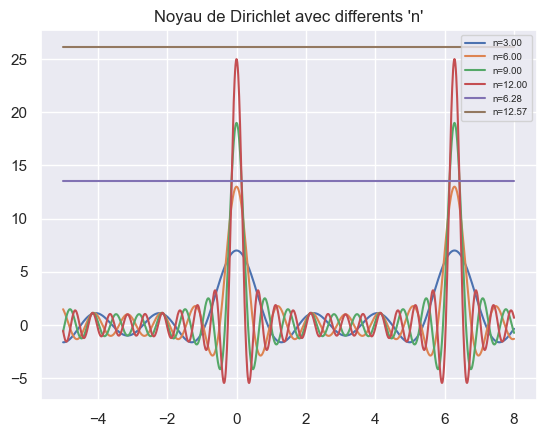

In [118]:
Y = np.linspace(-5, 8, 1000)

fig, ax = plt.subplots()
plt.title("Noyau de Dirichlet avec differents 'n'")
for i in N:
    ax.plot(Y, dirichlet(i,Y), label=f"n={i:.2f}")
plt.legend(fontsize=7,loc="upper right")
plt.show()

## **Question 3**

On pose


$\|D_n\|_1 = \frac{1}{2\pi} \int_{-\pi}^{\pi} |D_n(x)| \, dx.$

### (a)
Calculer $\|D_n\|_1$ en fonction de $n$. On pourra calculer l'intégrale par une formule des rectangles très précise ou utiliser la fonction `quad` de la bibliothèque `scipy.integrate`.

In [119]:
import scipy

def abs_dirichlet(x, i):
    if(abs(x)<= 1e-12):
        return 2*i+1
    return abs(np.sin((i+1/2)*x)/np.sin(x/2))

def integ_dirichlet_scipy(n):
    int1, err1 = scipy.integrate.quad(abs_dirichlet, -np.pi, -1e-4, args=(n,), limit=1000)
    int2, err2 = scipy.integrate.quad(abs_dirichlet, 1e-4, np.pi, args=(n,), limit=1000)
    return (int1+int2)/(2*np.pi)

def integ_dirichlet_rect(n):
    m = np.linspace(-np.pi, np.pi, 1000)
    h = m[1]-m[0]
    A = np.vectorize(abs_dirichlet)
    y = A(m,n)
    int1 = np.sum(h*y[0:-1])
    return int1/(2*np.pi)


### (b)
Représenter graphiquement $\|D_n\|_1$ en fonction de $n$.

C:\Users\polti\AppData\Local\Temp\ipykernel_13828\4255257525.py:9: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  int1, err1 = scipy.integrate.quad(abs_dirichlet, -np.pi, -1e-4, args=(n,), limit=1000)
C:\Users\polti\AppData\Local\Temp\ipykernel_13828\4255257525.py:10: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  int2, err2 = scipy.integrate.quad(abs_dirichlet, 1e-4, np.pi, args=(n,), limit=1000)


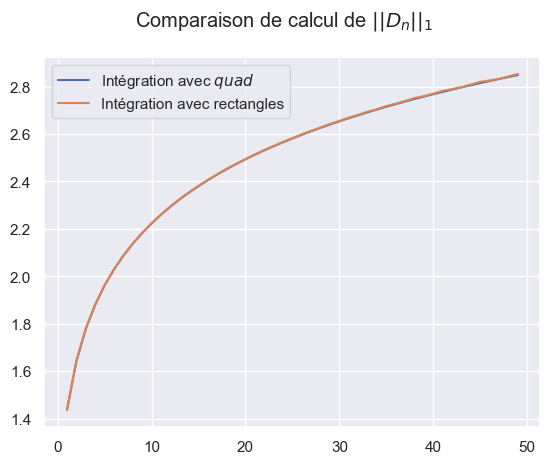

In [120]:
N = np.arange(50)
integ_dirichlet_scipy_vec = np.vectorize(integ_dirichlet_scipy)
integ_dirichlet_rect_vec = np.vectorize(integ_dirichlet_rect)


fig, ax = plt.subplots()
fig.suptitle("Comparaison de calcul de $||D_n||_1$")
ax.plot(np.arange(1,50), integ_dirichlet_scipy_vec(np.arange(1,50)), label="Intégration avec $quad$")
ax.plot(np.arange(1,50), integ_dirichlet_rect_vec(np.arange(1,50)),  label="Intégration avec rectangles")
plt.legend()
plt.show()

### (c)
Tracer la courbe $\ln n \mapsto \|D_n\|_1$ en fonction de $n$. Vous devez observer une droite (plus exactement, une courbe qui ressemble à une droite). Déterminer la pente de cette droite.  
*(Comparer avec la valeur exacte qui est $4/\pi^2$.)*

---

C:\Users\polti\AppData\Local\Temp\ipykernel_13828\4255257525.py:9: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  int1, err1 = scipy.integrate.quad(abs_dirichlet, -np.pi, -1e-4, args=(n,), limit=1000)
C:\Users\polti\AppData\Local\Temp\ipykernel_13828\4255257525.py:10: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  int2, err2 = scipy.integrate.quad(abs_dirichlet, 1e-4, np.pi, args=(n,), limit=1000)


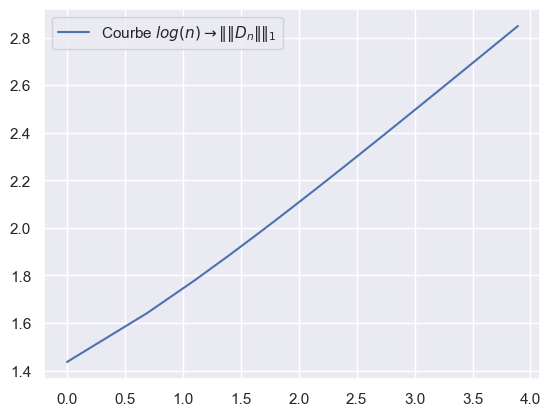

Max: 0.3980705146765603   Min: 0.29738799534974053   Moyenne: 0.38876759907102487
Valeur réelle:  0.4052847345693511


In [121]:
M = integ_dirichlet_scipy_vec(np.arange(1,50))
plt.plot(np.log(np.arange(1,50)), M, label=r"Courbe $log(n)\rightarrow\|\|D_n\|\|_1$")
plt.legend()
plt.show()
y = []

for i in range(1,49):
    y = np.append(y, (M[i]-M[i-1])/(np.log(i+1)-np.log(i)))
print("Max:", max(y), "  Min:", min(y), "  Moyenne:", np.mean(y))
print("Valeur réelle: ", 4/np.pi**2)

## **Question 4**

Le noyau de Fejér $F_n$ est défini pour tout entier $n \geq 1$ par

$F_n = \frac{1}{n + 1} \sum_{k=0}^{n} D_k.$

### (a)
Tracer le noyau de Fejér sur $[-\pi, \pi]$ pour diverses valeurs de $n$.

(50, 100000)


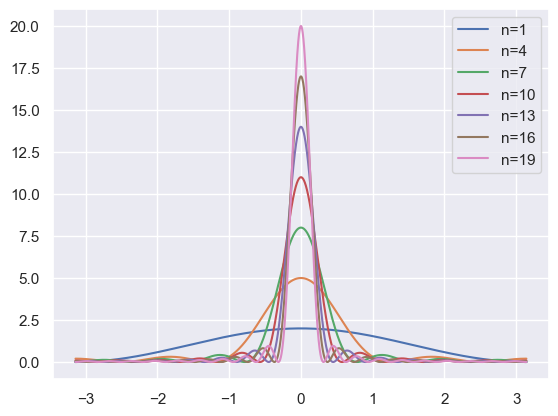

In [161]:
def dirichlet(i,x):
    if((i%(2*np.pi)) <= 1e-7):
        return 2*i+1
    return np.sin((i+1/2)*x)/np.sin(x/2)

A = np.vectorize(dirichlet)
B = np.zeros((50,100000))
for i in range(50):
    B[i] = A(i, np.linspace(-np.pi,np.pi, 100000))

print(B.shape)
Fejer = B.cumsum(axis=0)
norm = np.arange(1,51).reshape(50,1)
Fejer/=norm

N = np.arange(1,20, 3)
fig, ax = plt.subplots()
for n in N:
    ax.plot(np.linspace(-np.pi,np.pi,100000), Fejer[n], label=f"n={n}")
plt.legend()
plt.show()

### (b)
Représenter graphiquement $\|F_n\|_1$.

### (c)
Comparer les noyaux de Dirichlet et de Fejér.

[0.00000000e+00 3.10071814e-12 1.24028420e-11 ... 1.24028420e-11
 3.10071814e-12 0.00000000e+00]


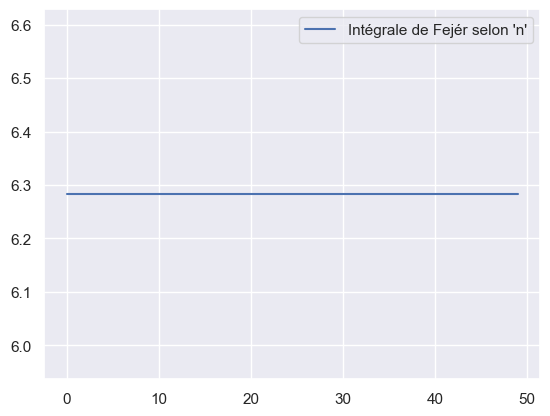

In [162]:
#si on utilise la méthode des rectangles on trouve
m = np.linspace(-np.pi,np.pi,100000)
h = m[1]-m[0]

IF = np.zeros(50)
print(h*Fejer[i])
for i in range(50):
    IF[i] = h*(Fejer[i, :-1]).sum()

plt.plot(np.arange(50), IF, label="Intégrale de Fejér selon 'n'")
plt.legend()
plt.show()